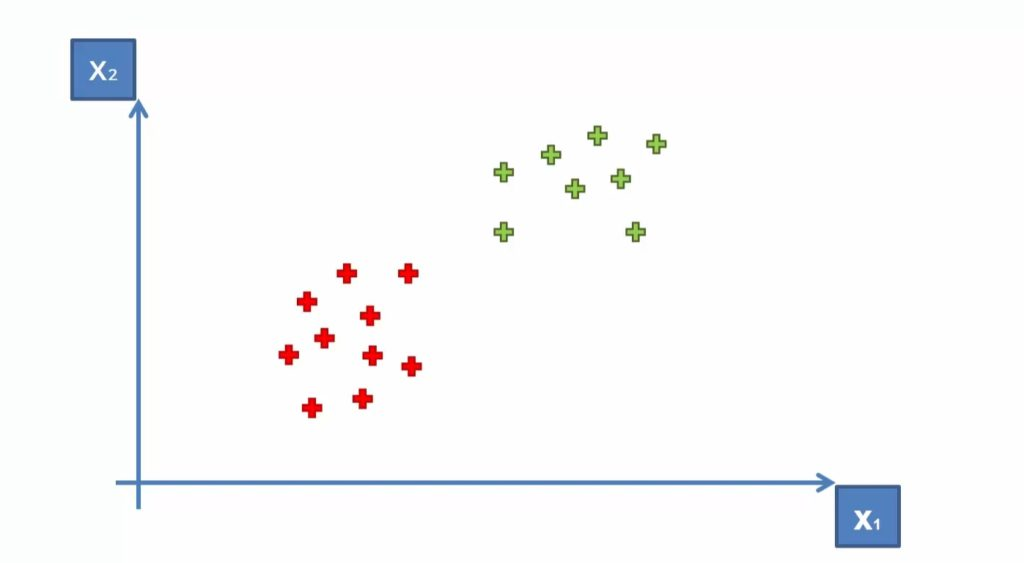

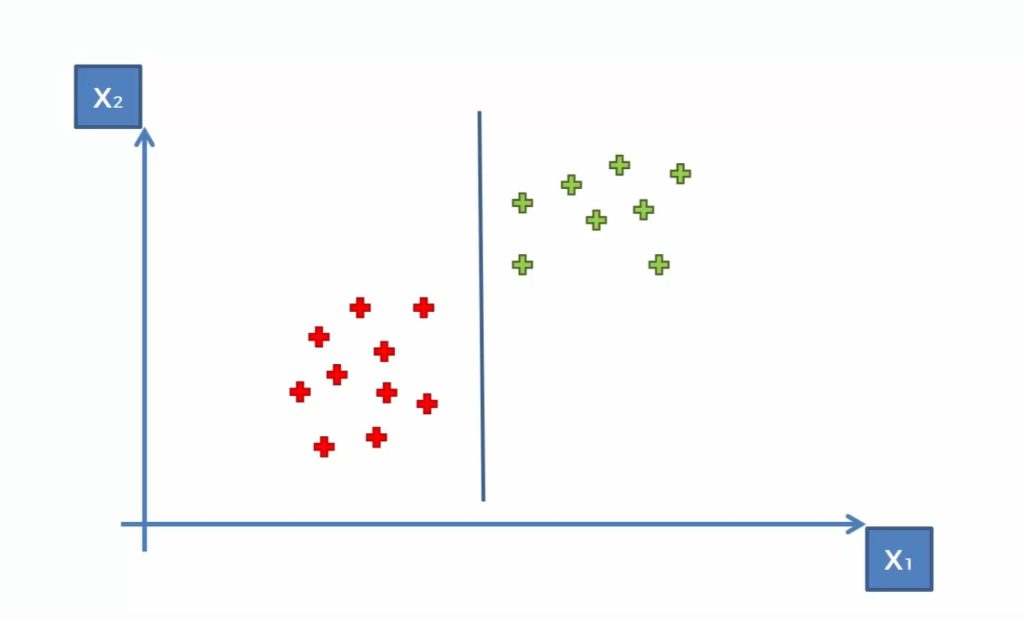

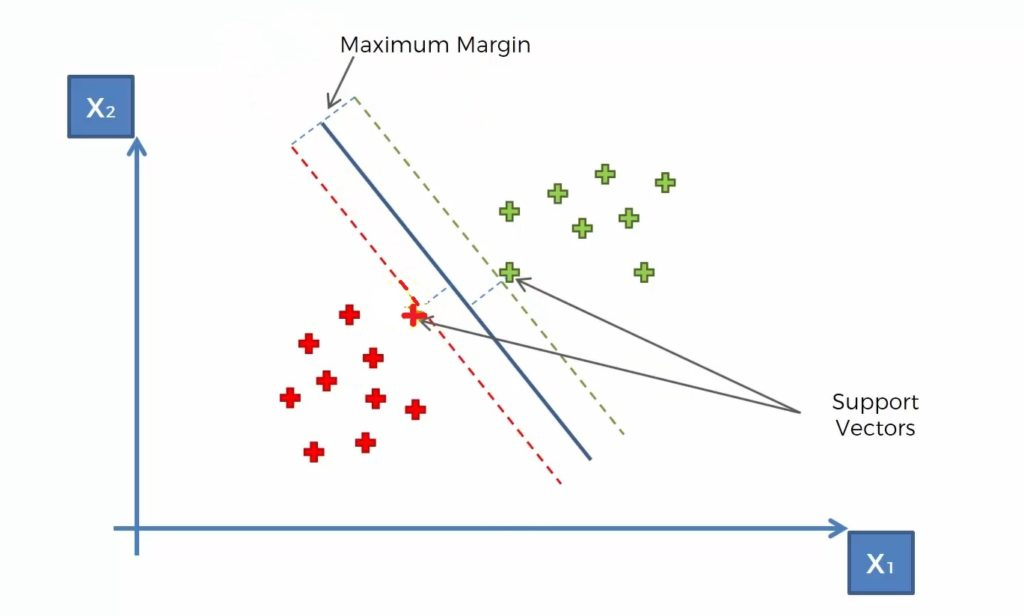
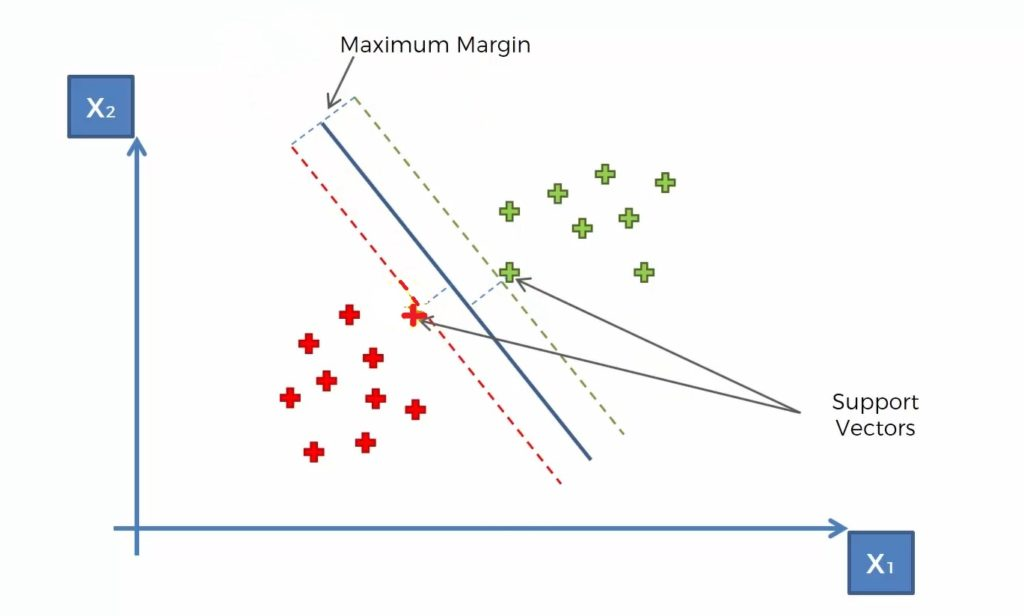

Support Vector Machine (SVM) is a supervised machine learning algorithm that is commonly used for classification and regression tasks. SVM is particularly effective in scenarios where the data is linearly separable or can be transformed into a linearly separable form. Here are some situations where SVM can be specifically useful:

1. Binary Classification: SVM is well-suited for binary classification problems where you have two classes to classify. It aims to find the optimal hyperplane that separates the data points of different classes with the maximum margin. SVM can handle both linearly separable and non-linearly separable data by using appropriate kernel functions.

2. Small to Medium-sized Datasets: SVM performs well on datasets with a small to medium number of samples. It can handle high-dimensional feature spaces efficiently and is less prone to overfitting compared to other algorithms like decision trees or neural networks.

3. Non-linear Data and Feature Transformation: SVM can handle non-linear data by applying a kernel trick, which implicitly maps the original features into a higher-dimensional space where linear separation is possible. This allows SVM to learn complex decision boundaries without explicitly computing the transformations.

4. Outlier Detection: SVM is relatively robust to outliers due to its use of support vectors, which are the data points closest to the decision boundary. The decision boundary is primarily determined by these support vectors, making SVM less influenced by outliers compared to other algorithms.

5. Text and Image Classification: SVM has been widely used in text categorization tasks, such as sentiment analysis or spam detection, where the feature space can be high-dimensional. It can also be applied to image classification problems by using suitable feature extraction techniques.

6. Dimensionality Reduction: SVM can be used for dimensionality reduction by selecting a subset of the most informative support vectors, which represent the original data in a lower-dimensional space. This can be useful for visualizing high-dimensional data or reducing the computational complexity of subsequent algorithms.

7. Kernals : 
   - There is linear kernal for linear Data
   - There is Gaussian Radial Basis Function (RBF) for non-linear data
   - There is Sigmoid for neural networks
   - There is other kernals as per need
  
However, it's worth noting that SVM may not be the best choice in scenarios with extremely large datasets or when interpretability of the model is crucial, as SVM doesn't provide inherent interpretability. In addition, training an SVM can be computationally expensive, especially when the dataset is large or the chosen kernel is computationally intensive. In such cases, alternative algorithms like logistic regression or gradient boosting may be more suitable.

Best Explanation : 
https://www.freecodecamp.org/news/svm-machine-learning-tutorial-what-is-the-support-vector-machine-algorithm-explained-with-code-examples/#:~:text=SVMs%20are%20used%20in%20applications,linear%20and%20non%2Dlinear%20data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [26]:
df = pd.read_csv('./Data/Social_Network_Ads.csv',usecols=['Age','EstimatedSalary','Purchased'])
df.sample(5)

,Age,EstimatedSalary,Purchased
8,25,33000,0
389,48,35000,1
284,48,141000,0
221,35,91000,1
67,23,82000,0


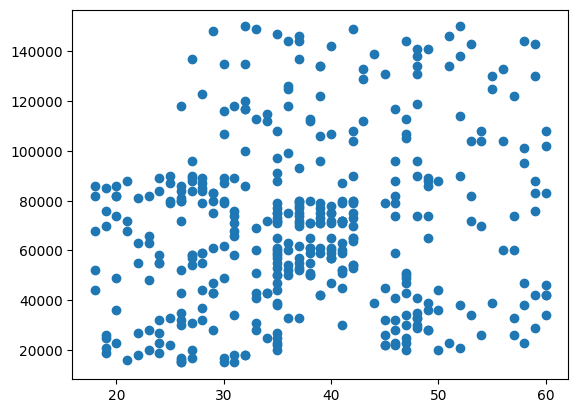

In [22]:
plt.scatter(x=df['Age'],y=df['EstimatedSalary'])

In [7]:
x = df.iloc[:,[0,1]]
y = df.iloc[:,2]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [12]:
y_pred = classifier.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

[[51  8]
 [ 0 21]]
0.9
0.7241379310344828


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


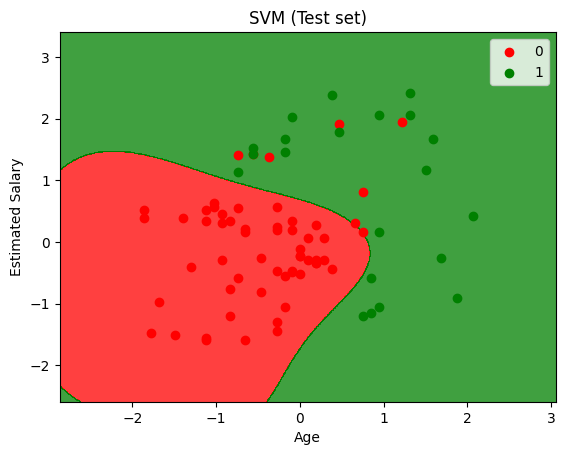

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()